# (Human) Race Classifier Using Color Histogram
import all the important library

In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from os import walk
from matplotlib import cm

Using TensorFlow backend.


## Get Files Function From a Folder

In [2]:
def get_files(folder_name):
    entries = os.listdir(folder_name)
    temp = []
    for (dirpath, dirnames, filenames) in walk(folder_name):
        for x in filenames:
            if x.endswith(".jpg"):
                temp.append(os.path.join(dirpath, x))
    return temp

## (Human) Race Class Statistic

In [3]:
dataframe = pd.read_csv('dataset_label.csv')
tmp = {}
tmp[0] = 0
tmp[1] = 0
tmp[2] = 0
for i in dataframe['ethnic']:
    tmp[i] += 1
print('Negroid class image(s):',tmp[0])
print('Mongoloid class image(s):',tmp[1])
print('Caucasoid class image(s):',tmp[2])

Negroid class image(s): 592
Mongoloid class image(s): 592
Caucasoid class image(s): 592


## Feature Extraction From Image

In [4]:
from os import walk
def read_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    return img

def prep_data(images):
    count = len(images)
    data = np.ndarray([count,256], dtype=np.uint8)
    lst_images = []

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        hist, bins = np.histogram(image.ravel(),256,[0,256])

        lst_images.append(image)
        data[i] = hist
    return lst_images, data

## Seperate Label & Feature

In [5]:
lst_images, image_df = prep_data(dataframe['file_name'])
label = dataframe['ethnic']

## Data Sample

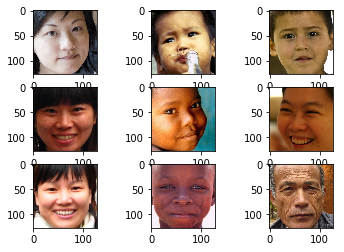

In [6]:
fig = plt.figure()

for i in range(9):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.imshow(lst_images[i])
plt.show()

## Color Histogram Example

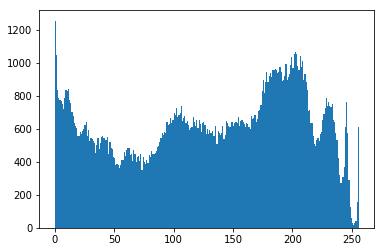

In [7]:
tmp_img = cv2.imread(dataframe['file_name'][1],0)
a = tmp_img.ravel(),256,[0,256]
plt.hist(tmp_img.ravel(),256,[0,256])
plt.show()

## Seperate Data to Training And Testing

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_df, label,test_size=0.30)

## Defined The Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
classifiers = [
    KNeighborsClassifier(3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
]

## Helper Function for Classifying

In [10]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
def plot_regression(actual, pred, model_name):
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(actual, pred)))
    print('Mean Absolute Error:', mean_absolute_error(actual, pred))

    fig = plt.figure(figsize=(12,6))
    plt.plot(np.array(actual)[:50])
    plt.plot(pred[:50])
    plt.legend(['actual', 'prediction'])
    fig.suptitle(model_name)
    print('Plot is only for first 50 values')

def classified(model):
    start_time = time.time()
    
    var_model = model
    var_model.fit(x_train, y_train)
    y_pred = var_model.predict(x_test)
    
    score = var_model.score(x_train, y_train)
    print('Score:',score*100,' %')
    

    elapsed_time = time.time() - start_time
    print('Algorithm succesfully ran in:',elapsed_time,' s')
    plot_regression(y_test, y_pred, type(model).__name__)

    return model

## Run The Classifier
### Race Code Explanation
* 0: African (Negroid)
* 1: Asian (East Asia) (Mongoloid)
* 2: European (Caucasoid)

KNeighborsClassifier
Score: 69.18744971842317  %
Algorithm succesfully ran in: 1.2812597751617432  s
Root Mean Squared Error: 1.100059694781402
Mean Absolute Error: 0.7673545966228893
Plot is only for first 50 values

RandomForestClassifier
Score: 65.48672566371681  %
Algorithm succesfully ran in: 0.016674280166625977  s
Root Mean Squared Error: 1.0724242670838786
Mean Absolute Error: 0.7373358348968105
Plot is only for first 50 values

AdaBoostClassifier
Score: 59.935639581657284  %
Algorithm succesfully ran in: 1.1971569061279297  s
Root Mean Squared Error: 1.0314018948343644
Mean Absolute Error: 0.7185741088180112
Plot is only for first 50 values



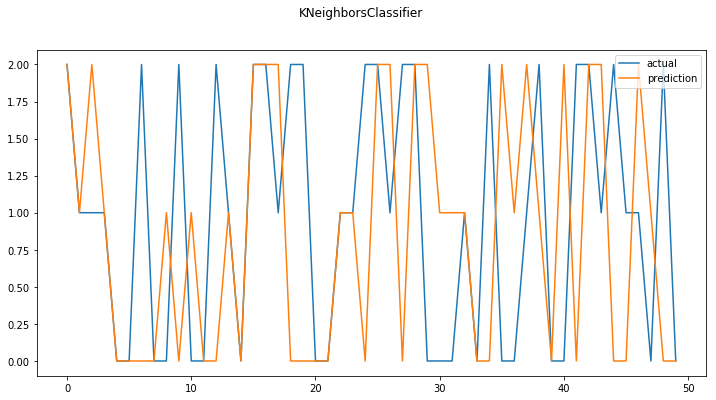

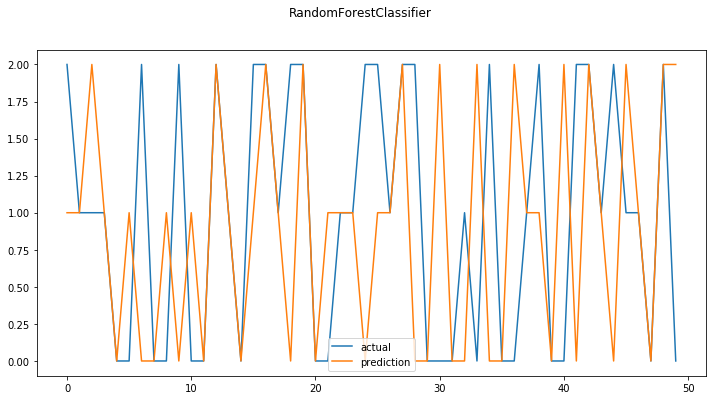

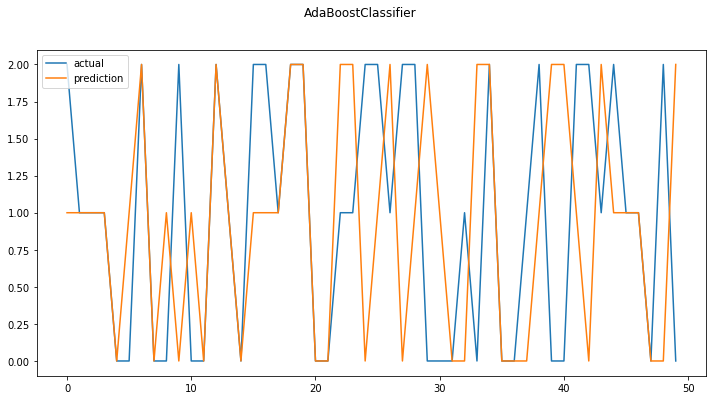

In [11]:
for classifier in classifiers:
    print(type(classifier).__name__)
    classified(classifier)
    print()